In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping , ReduceLROnPlateau
from nltk.stem import PorterStemmer , WordNetLemmatizer
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report
from tensorflow.keras.layers import Conv1D , Flatten , Dense , Embedding , Dropout , MaxPooling1D
from tensorflow.keras import Sequential


In [2]:
nltk.download("stopwords")
nltk.download("words")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to

[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...

[nltk_data]   Package stopwords is already up-to-date!

[nltk_data] Downloading package words to

[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...

[nltk_data]   Package words is already up-to-date!

[nltk_data] Downloading package punkt to

[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...

[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
df = pd.read_csv(r"C:\Users\Administrator\Downloads\Emotion_final.csv_5\Emotion_final.csv")
df

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
21454,Melissa stared at her friend in dism,fear
21455,Successive state elections have seen the gover...,fear
21456,Vincent was irritated but not dismay,fear
21457,Kendall-Hume turned back to face the dismayed ...,fear


In [4]:
df.describe()

,Text,Emotion
count,21459,21459
unique,21405,6
top,i feel so tortured by it,happy
freq,2,7029


In [5]:
df.shape

(21459, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 21459 entries, 0 to 21458

Data columns (total 2 columns):

 #   Column   Non-Null Count  Dtype 

---  ------   --------------  ----- 

 0   Text     21459 non-null  object

 1   Emotion  21459 non-null  object

dtypes: object(2)

memory usage: 335.4+ KB


In [7]:
df["Text"][1]

'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake'

In [8]:
df["Emotion"].unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'happy'],
      dtype=object)

In [9]:
df["Emotion"].value_counts(ascending = True)

Emotion
surprise     879
love        1641
fear        2652
anger       2993
sadness     6265
happy       7029
Name: count, dtype: int64

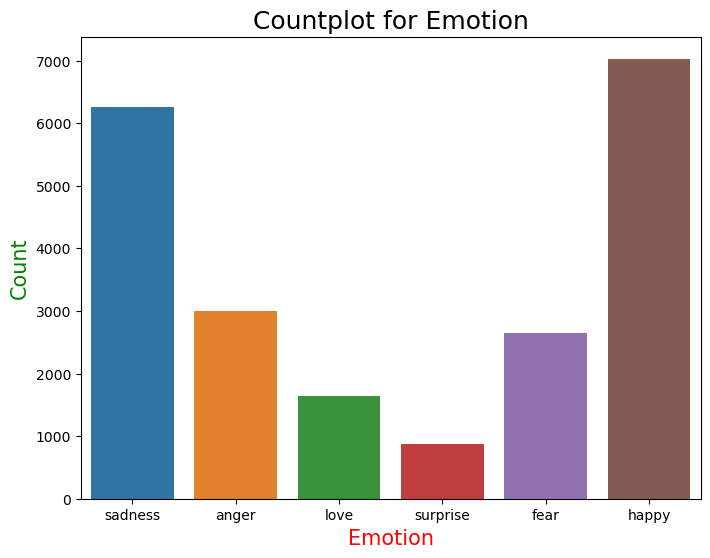

In [10]:
## Countplot for Emotion

plt.figure(figsize = (8,6))
sns.countplot(x = "Emotion" , data = df)
plt.title("Countplot for Emotion" , fontsize = 18 , c="k")
plt.xlabel("Emotion" , fontsize = 15 , c = "r")
plt.ylabel("Count" , fontsize = 15 , c = "g")
plt.show()

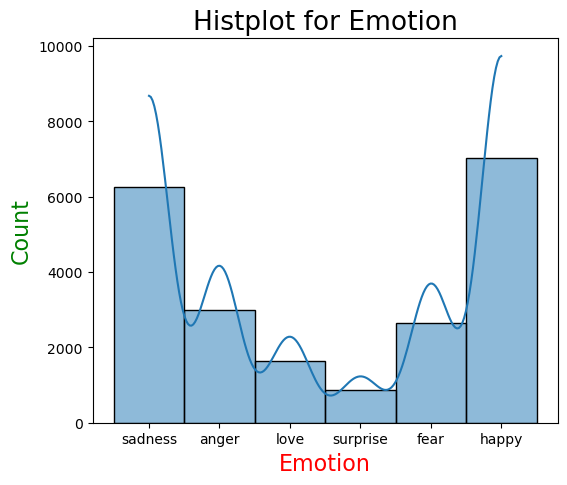

In [11]:
plt.figure(figsize = (6,5))
sns.histplot(x="Emotion" , kde = True , bins = 30 , data = df)
plt.title("Histplot for Emotion" , fontsize = 19 , c="k")
plt.xlabel("Emotion" , fontsize = 16 , c="r")
plt.ylabel("Count" , fontsize = 16 , c="g")
plt.show()

In [12]:
df.isnull().sum()

Text       0
Emotion    0
dtype: int64

In [13]:
df["Text"].value_counts()

Text
i feel so tortured by it                                                                                                          2
i feel pretty weird blogging about deodorant but im a bit of a deodorant snob and find it really hard to find a good one          2
i feel so blessed to be a part of your days                                                                                       2
i began to feel accepted by gaia on her own terms                                                                                 2
i honestly feel at heart we should be faithful to each other if its yo girl                                                       2
                                                                                                                                 ..
i am blank completely i am just feeling every emotion as precious would feel it and how she should feel it                        1
i really feel like an idiotic                                          

In [14]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
21454    False
21455    False
21456    False
21457    False
21458    False
Length: 21459, dtype: bool

In [15]:
df.duplicated().sum()

3

Process missing values

In [16]:
## process missing values in text

df["Text"].fillna("unknown" , inplace = True)

df["Text"].replace("" , inplace = True)


Preprocessing on Text

In [17]:
## preprocessing text

def process_Text(Text):
    
    ## transform text to lowercase
    Text = Text.lower()
    
    ## remove punctuations
    Text = re.sub(r"[^\w\s]" , "" , Text)
    
    ## remove numbers
    Text = re.sub(r"\d+" , "" , Text)
    
    ## split text into tokens
    tokens = word_tokenize(Text)
    
    ## remove stopwords
    stop_words = set(stopwords.words("English"))
    tokens = [word for word in tokens if word not in stop_words]
    
    ## Stemmer
    stemmer = PorterStemmer()
    stemme_tokens = [stemmer.stem(token) for token in tokens]
    
    ## Lemmatizer
    lemmatizer = WordNetLemmatizer()
    lemmatize_tokens = [lemmatizer.lemmatize(token) for token in stemme_tokens]
    
    return " ".join(lemmatize_tokens)


In [18]:
df["processed_Text"] = df["Text"].apply(process_Text)

In [19]:
df["processed_Text"]

0                                        didnt feel humili
1        go feel hopeless damn hope around someon care ...
2                     im grab minut post feel greedi wrong
3           ever feel nostalg fireplac know still properti
4                                             feel grouchi
                               ...                        
21454                            melissa stare friend dism
21455    success state elect seen govern parti pummel d...
21456                                 vincent irrit dismay
21457                kendallhum turn back face dismay coup
21458                                        dismay surpri
Name: processed_Text, Length: 21459, dtype: object

In [20]:
df["processed_Text"][1]

'go feel hopeless damn hope around someon care awak'

In [21]:
from sklearn.preprocessing import LabelEncoder

Encoder = LabelEncoder()

df["Emotion"] = Encoder.fit_transform(df["Emotion"])
df["Emotion"]

0        4
1        4
2        0
3        3
4        0
        ..
21454    1
21455    1
21456    1
21457    1
21458    1
Name: Emotion, Length: 21459, dtype: int32

In [22]:
df["Emotion"].unique()

array([4, 0, 3, 5, 1, 2])

In [23]:
df.head(10).style.background_gradient(cmap = "Blues")

,Text,Emotion,processed_Text
0,i didnt feel humiliated,4,didnt feel humili
1,i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake,4,go feel hopeless damn hope around someon care awak
2,im grabbing a minute to post i feel greedy wrong,0,im grab minut post feel greedi wrong
3,i am ever feeling nostalgic about the fireplace i will know that it is still on the property,3,ever feel nostalg fireplac know still properti
4,i am feeling grouchy,0,feel grouchi
5,ive been feeling a little burdened lately wasnt sure why that was,4,ive feel littl burden late wasnt sure
6,ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny,5,ive take milligram time recommend amount ive fallen asleep lot faster also feel like funni
7,i feel as confused about life as a teenager or as jaded as a year old man,1,feel confus life teenag jade year old man
8,i have been with petronas for years i feel that petronas has performed well and made a huge profit,2,petrona year feel petrona perform well made huge profit
9,i feel romantic too,3,feel romant


In [24]:
data = df.drop("Text" , axis = 1)
data

,Emotion,processed_Text
0,4,didnt feel humili
1,4,go feel hopeless damn hope around someon care ...
2,0,im grab minut post feel greedi wrong
3,3,ever feel nostalg fireplac know still properti
4,0,feel grouchi
...,...,...
21454,1,melissa stare friend dism
21455,1,success state elect seen govern parti pummel d...
21456,1,vincent irrit dismay
21457,1,kendallhum turn back face dismay coup


Split Data to X and y

In [25]:
X = data["processed_Text"]

y = df["Emotion"]

In [26]:
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , 
                                                      shuffle = True , random_state = 42)

In [27]:
print("x_train shape" , x_train.shape)
print("x_test shape" , x_test.shape)
print("y_train shape" , y_train.shape)
print("y_test shape" , y_test.shape)

x_train shape (17167,)

x_test shape (4292,)

y_train shape (17167,)

y_test shape (4292,)


In [28]:
## Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

train_sequences = tokenizer.texts_to_sequences(x_train)
test_sequences = tokenizer.texts_to_sequences(x_test)


In [29]:
# pad sequences#

max_len = 100

train_sequences = pad_sequences(train_sequences , maxlen = max_len ,
                               padding = "post" ,
                               truncating = "post")


test_sequences = pad_sequences(test_sequences , maxlen = max_len ,
                              padding = "post" , 
                              truncating = "post")


In [30]:
## calculate vocab_size

vocab_size = len(tokenizer.word_index) + 1

## set embedding dim

embedding_dim = 50

## set num of classes

num_classes = 6

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout
from tensorflow.keras.regularizers import l2

# بناء النموذج
model = Sequential()

# طبقة Conv1D مع Regularization و Dropout
model.add(Embedding(input_dim = vocab_size , 
                   output_dim = embedding_dim ,
                   input_length = max_len))
model.add(Conv1D(64, kernel_size=3, activation='relu', kernel_regularizer=l2(0.002)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))  # Dropout لتقليل الافراط في التدريب

model.add(Conv1D(128, kernel_size=3, activation='relu', kernel_regularizer=l2(0.002)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))

model.add(Flatten())

# الطبقات Dense مع Regularization و Dropout
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.002)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.002)))
model.add(Dropout(0.5))

# الطبقة النهائية
model.add(Dense(num_classes, activation='softmax'))

# تجميع النموذج
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# تدريب النموذج مع Data Augmentation
history = model.fit(train_sequences, y_train, epochs=40, batch_size=64, 
                    validation_data=(test_sequences, y_test))

# تقييم النموذج
test_loss, test_acc = model.evaluate(test_sequences, y_test)
print(f'Test Accuracy: {test_acc}')

Epoch 1/40


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.

  warnings.warn(


269/269 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.3083 - loss: 2.0790 - val_accuracy: 0.3218 - val_loss: 1.6427

Epoch 2/40

269/269 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.3234 - loss: 1.5471 - val_accuracy: 0.4059 - val_loss: 1.2999

Epoch 3/40

269/269 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.4264 - loss: 1.2629 - val_accuracy: 0.4473 - val_loss: 1.2088

Epoch 4/40

269/269 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.4859 - loss: 1.1533 - val_accuracy: 0.5792 - val_loss: 1.1326

Epoch 5/40

269/269 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.5983 - loss: 1.0500 - val_accuracy: 0.6139 - val_loss: 1.1020

Epoch 6/40

269/269 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.6399 - loss: 0.9720 - val_accuracy: 0.6302 - val_loss: 1.0780

Epoch 7/40

269/269 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.6703 - loss: 0.8903 - val_accuracy: 0.6354 - val_loss: 1.0645

Epoch 8/40

269/269 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.6766 - loss: 0.8594 - val_a

In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 50)        │       586,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 98, 64)         │         9,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 49, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 49, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 47, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 23, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 23, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2944)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       376,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,020,024 (11.52 MB)

 Trainable params: 1,006,674 (3.84 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,013,350 (7.68 MB)

In [33]:
test_accuracy , test_loss = model.evaluate(test_sequences , y_test)


135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8047 - loss: 1.2749


In [34]:
y_pred = model.predict(test_sequences)


135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [35]:
probs = np.max(y_pred , axis = 1)
y_pred_class = np.argmax(y_pred , axis = 1)

In [36]:
report_dict = classification_report(y_test , y_pred_class , output_dict = True)
df_report = pd.DataFrame(report_dict).transpose()
df_report

,precision,recall,f1-score,support
0,0.780000,0.821718,0.800316,617.000000
1,0.745597,0.717514,0.731286,531.000000
2,0.831476,0.864591,0.847710,1381.000000
3,0.640379,0.638365,0.639370,318.000000
4,0.915903,0.861394,0.887813,1277.000000
5,0.406780,0.428571,0.417391,168.000000
accuracy,0.805452,0.805452,0.805452,0.805452
macro avg,0.720022,0.722026,0.720648,4292.000000
weighted avg,0.807789,0.805452,0.806145,4292.000000


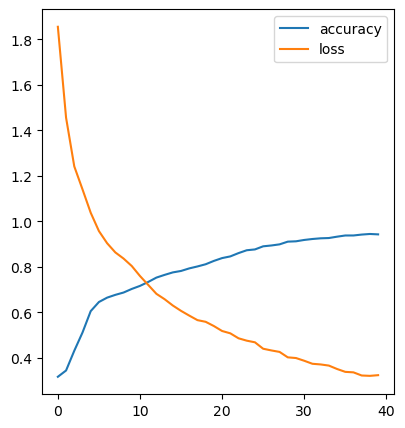

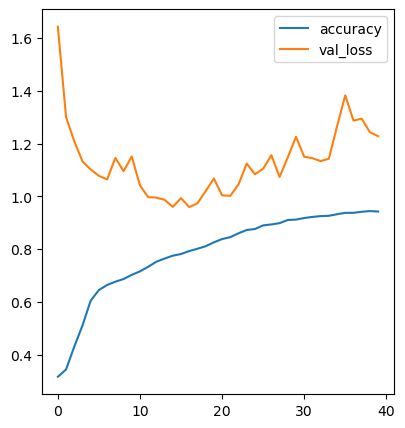

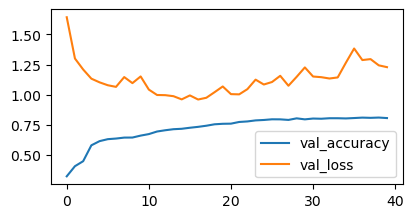

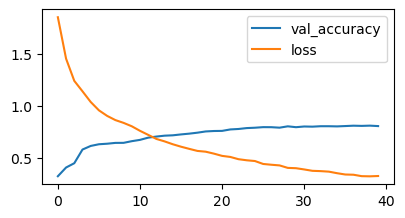

In [37]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"] , label = "accuracy")
plt.plot(history.history["loss"] , label = "loss")
plt.legend()
plt.show()


plt.figure(figsize = (10,5))
plt.subplot(1,2,2)
plt.plot(history.history["accuracy"] , label = "accuracy")
plt.plot(history.history["val_loss"] , label = "val_loss")
plt.legend()
plt.show()


plt.figure(figsize = (10,5))
plt.subplot(2,2,3)
plt.plot(history.history["val_accuracy"] , label = "val_accuracy")
plt.plot(history.history["val_loss"] , label = "val_loss")
plt.legend()
plt.show()


plt.figure(figsize = (10,5))
plt.subplot(2,2,4)
plt.plot(history.history["val_accuracy"] , label = "val_accuracy")
plt.plot(history.history["loss"] , label = "loss")
plt.legend()
plt.show()


Predict The Emotion

In [38]:
from textblob import TextBlob

def sentiment_analysis(processed_Text):
    blob = TextBlob(processed_Text)
    classified = blob.sentiment.polarity
    
    if classified <= 0:
        return "sadness"
    
    elif 0 < classified < 2:
        return "anger"
    
    elif 1 < classified  <3:
        return "fear"
    
    elif 2 < classified  <4:
        return "surprise"
    
    elif  3 < classified  <5:
        return "love"
    
    else:
        return "happy"
    

test_Texts = [

    "this situation is making me really nervous and anxious",
    "this makes me so angry, i can not stand it anymore",
    " it is hard to find joy in anything these days"

]


for text in test_Texts:
    sentiment = sentiment_analysis(text)
    print(f" test_texts: {text}\nsentiment :{sentiment}\n")

 test_texts: this situation is making me really nervous and anxious

sentiment :sadness



 test_texts: this makes me so angry, i can not stand it anymore

sentiment :sadness



 test_texts:  it is hard to find joy in anything these days

sentiment :anger


